Fast Food & General Nutrition Analysis


**Author:** Derek Singleton
**Course:** Data Science & Analytics  
**Date:** December 2025  


---

## Executive Summary

### 🎯 Project Goal
This capstone project analyzes and compares nutritional profiles between fast food menu items and general food products to answer the question: **"When people are busy, what are the healthiest options available — and how can data help them make better decisions quickly?"**


### 📊 Key Findings
*(Run all cells to see computed values in Section 10)*
- Fast food items have significantly higher sodium density compared to general foods
- Health classification reveals distinct nutritional profiles across food categories
- Machine learning models achieve strong predictive performance for calorie estimation
- Classification models can accurately categorize foods by health profile

### 🛠️ Methods Used
- **Data Sources:** 2 Kaggle datasets (517 fast food items, 8,791 general foods) + USDA FoodData Central API validation
- **Analysis:** Schema alignment, exploratory data analysis, feature engineering, statistical comparison
- **Visualization:** 7 static visualizations (matplotlib/seaborn) + 2 interactive dashboards (Plotly)
- **Machine Learning:** Regression models for calorie prediction + Classification for health categorization

### 💡 Actionable Insights
*(To be populated after analysis)*
- Consumers can identify healthier fast food options using our nutrient density score
- Healthcare professionals can use the comparison framework for patient education
- Restaurant chains can benchmark their menu items against nutritional standards

---



## 1. Problem Statement & Research Question

### 🔍 The Problem

In today's fast-paced world, many people lack the time, resources, or energy to prepare nutritious meals at home. As a result, they frequently turn to convenient fast-food options — but these choices vary dramatically in nutritional quality.

**Challenges:**
- **Consumers** → Struggle to make informed dietary decisions under time pressure
- **Healthcare professionals** → Need data-driven tools to guide patients on nutrition
- **Researchers/educators** → Lack comprehensive comparisons between fast food and general food supply

### ❓ Research Question

> **"What is the nutritional difference between fast food menu items and general food items, and how do these values compare against authoritative USDA standards?"**

### 📋 Sub-Questions
1. What are the key nutritional differences in calories, macronutrients, and micronutrients?
2. Which fast food items approach the nutritional profile of healthier general foods?
3. Can we build a predictive model to estimate nutritional values based on food characteristics?
4. What patterns emerge when comparing restaurant chains?

### 🎓 Project Scope

This analysis focuses on:
- **Nutrients:** Calories, protein, fat (total/saturated), carbohydrates, fiber, sugar, sodium, vitamins
- **Food Types:** Fast food restaurant items vs. general food products
- **Validation:** Cross-referencing with USDA FoodData Central official standards

**Out of Scope:** Meal planning, dietary recommendations for specific medical conditions, cost analysis

---

## 2. Data Sources & Acquisition

### 📚 Dataset Overview

| Dataset | Source | Size | Key Features |
|---------|--------|------|-------------|
| **Fast Food Nutrition** | [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition) | 517 items | Restaurant, item name, 17 nutritional attributes |
| **General Food Nutrition** | [Kaggle](https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive) | 8,791 items | USDA NDB database with 50+ nutritional attributes |
| **USDA FoodData Central** | [API](https://fdc.nal.usda.gov/api-guide.html) | Validation | Official government nutritional standards |

### 🔗 How Datasets Relate

**Integration Strategy:**
- **Common Dimensions:** Nutritional attributes (calories, protein, fat, carbs, sodium)
- **Alignment Challenge:** Different column names, units, and schemas
- **Solution:** Create normalized schema with standardized units (grams, mg, calories)
- **Validation:** Use USDA API to verify accuracy of overlapping items (e.g., "cheeseburger")

```
┌─────────────────────┐
│   Fast Food Data    │
│  (517 items)        │
│  - Restaurant       │
│  - calories         │
│  - protein          │
└──────────┬──────────┘
           │
           │  Normalized Schema
           │  (Common Nutrients)
           │
┌──────────┴──────────┐
│ General Food Data   │
│  (8,791 items)      │
│  - Shrt_Desc        │
│  - Energ_Kcal       │
│  - Protein_(g)      │
└─────────────────────┘
           │
           │  Validation
           │
┌──────────┴──────────┐
│   USDA API          │
│  (Reference Data)   │
└─────────────────────┘
```

---

## 3. Environment Setup & Data Loading

### 📦 Import Required Libraries

We'll use:
- **Data Manipulation:** `pandas`, `numpy`
- **Visualization:** `matplotlib`, `seaborn`, `plotly`
- **Machine Learning:** `scikit-learn`
- **API Access:** `requests`, `python-dotenv`
- **Statistical Analysis:** `scipy`

In [6]:
# Core libraries
import pandas as pd
import numpy as np
import os
import warnings
from dotenv import load_dotenv
import requests
import json

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Statistical analysis
from scipy import stats

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load environment variables
load_dotenv('.env.local')
USDA_API_KEY = os.getenv('USDA_API_KEY', 'DEMO_KEY')

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔑 USDA API Key loaded: {'Yes' if USDA_API_KEY else 'No'}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔑 USDA API Key loaded: Yes


### 📂 Load Datasets

We'll load both CSV files and perform initial inspection.

In [7]:
# Load datasets
fastfood_df = pd.read_csv('datasets/fastfood.csv')
general_nutrition_df = pd.read_csv('datasets/food_nutrition.csv')

print("=" * 70)
print(" DATA LOADING SUMMARY ")
print("=" * 70)
print(f"\n📌 Fast Food Dataset:")
print(f"   Rows: {len(fastfood_df):,}")
print(f"   Columns: {len(fastfood_df.columns)}")
print(f"   Memory: {fastfood_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print(f"\n📌 General Nutrition Dataset:")
print(f"   Rows: {len(general_nutrition_df):,}")
print(f"   Columns: {len(general_nutrition_df.columns)}")
print(f"   Memory: {general_nutrition_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n✅ Datasets loaded successfully!")

 DATA LOADING SUMMARY 

📌 Fast Food Dataset:
   Rows: 515
   Columns: 17
   Memory: 151.05 KB

📌 General Nutrition Dataset:
   Rows: 8,790
   Columns: 54
   Memory: 5179.07 KB

✅ Datasets loaded successfully!


---

## 4. Data Understanding & Schema Exploration

### 🔍 Purpose
Before analysis, we need to understand:
1. What data do we actually have?
2. What are the column names and data types?
3. Are there missing values or data quality issues?
4. How do the two datasets differ in structure?

This step is **critical** because the two datasets have completely different schemas that need alignment.

### 4.1 Fast Food Dataset Schema

In [8]:
print("=" * 70)
print(" FAST FOOD DATASET SCHEMA ")
print("=" * 70)

print("\n📋 Column Information:")
print(fastfood_df.info())

print("\n📊 Sample Data (First 3 rows):")
display(fastfood_df.head(3))

print("\n📈 Descriptive Statistics:")
display(fastfood_df.describe())

print("\n🏢 Unique Restaurants:")
print(fastfood_df['restaurant'].value_counts())

 FAST FOOD DATASET SCHEMA 

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory 

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other



📈 Descriptive Statistics:


,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000



🏢 Unique Restaurants:
restaurant
Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64


### 4.2 General Nutrition Dataset Schema

In [9]:
print("=" * 70)
print(" GENERAL NUTRITION DATASET SCHEMA ")
print("=" * 70)

print("\n📋 Column Information:")
print(general_nutrition_df.info())

print("\n📊 Sample Data (First 3 rows):")
display(general_nutrition_df.head(3))

print("\n📈 Descriptive Statistics (Key Nutrients):")
key_cols = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Sodium_(mg)', 'Sugar_Tot_(g)']
display(general_nutrition_df[key_cols].describe())

 GENERAL NUTRITION DATASET SCHEMA 

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.8,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.8,1 tbsp,205.0,1 cup,0.0



📈 Descriptive Statistics (Key Nutrients):


,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sodium_(mg),Sugar_Tot_(g)
count,8790.000000,8790.000000,8790.000000,8790.000000,8707.000000,6958.000000
mean,226.317634,11.342849,10.553725,22.127710,312.495923,8.543066
std,169.877539,10.530474,15.814842,27.270822,943.431341,14.923626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,2.380000,0.950000,0.050000,41.000000,0.000000
50%,191.000000,8.000000,5.140000,9.340000,88.000000,1.840000
75%,337.000000,19.880000,13.720000,34.910000,404.500000,9.287500
max,902.000000,88.320000,100.000000,100.000000,38758.000000,99.800000


### 4.3 Missing Data Analysis

**Why this matters:** Missing data can bias our analysis. We need to understand the extent and pattern of missingness.

 MISSING DATA ANALYSIS 

📌 Fast Food Dataset:
         Missing Count  Percentage
vit_a              214   41.553398
calcium            210   40.776699
vit_c              210   40.776699
fiber               12    2.330097
protein              1    0.194175

📌 General Nutrition Dataset:
                   Missing Count  Percentage
Choline_Tot_ (mg)           4016   45.688282
GmWt_2                      3965   45.108077
GmWt_Desc2                  3965   45.108077
Vit_K_(µg)                  3563   40.534699
Lut+Zea_ (µg)               3315   37.713311
Lycopene_(µg)               3292   37.451650
Beta_Crypt_(µg)             3270   37.201365
Vit_D_µg                    3262   37.110353
Alpha_Carot_(µg)            3258   37.064846
Vit_D_IU                    3211   36.530148


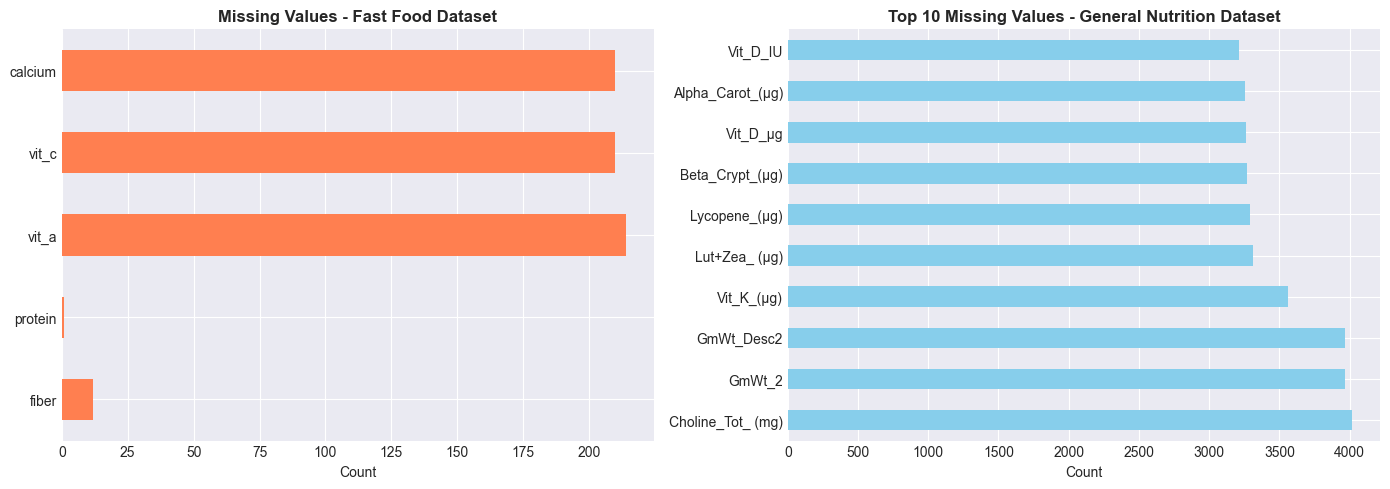


💡 Insight: We'll need to handle missing values during data integration.


In [10]:
print("=" * 70)
print(" MISSING DATA ANALYSIS ")
print("=" * 70)

print("\n📌 Fast Food Dataset:")
fastfood_missing = fastfood_df.isnull().sum()
fastfood_missing_pct = (fastfood_missing / len(fastfood_df)) * 100
missing_ff = pd.DataFrame({
    'Missing Count': fastfood_missing,
    'Percentage': fastfood_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_ff[missing_ff['Missing Count'] > 0])

print("\n📌 General Nutrition Dataset:")
general_missing = general_nutrition_df.isnull().sum()
general_missing_pct = (general_missing / len(general_nutrition_df)) * 100
missing_gn = pd.DataFrame({
    'Missing Count': general_missing,
    'Percentage': general_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_gn[missing_gn['Missing Count'] > 0].head(10))

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fast Food missing data
if fastfood_missing.sum() > 0:
    fastfood_missing[fastfood_missing > 0].plot(kind='barh', ax=axes[0], color='coral')
    axes[0].set_title('Missing Values - Fast Food Dataset', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Count')
else:
    axes[0].text(0.5, 0.5, 'No Missing Data!', ha='center', va='center', fontsize=14)
    axes[0].set_title('Missing Values - Fast Food Dataset', fontsize=12, fontweight='bold')

# General Nutrition missing data (top 10)
top_missing = general_missing[general_missing > 0].nlargest(10)
if len(top_missing) > 0:
    top_missing.plot(kind='barh', ax=axes[1], color='skyblue')
    axes[1].set_title('Top 10 Missing Values - General Nutrition Dataset', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Count')
else:
    axes[1].text(0.5, 0.5, 'No Missing Data!', ha='center', va='center', fontsize=14)
    axes[1].set_title('Missing Values - General Nutrition Dataset', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Insight: We'll need to handle missing values during data integration.")

---

## 5. Data Integration Strategy

### 🎯 Challenge
The two datasets have **completely different schemas**:
- Different column names (e.g., `calories` vs `Energ_Kcal`)
- Different units (some nutrients in mg vs g)
- Different levels of detail (17 vs 50+ columns)

### 🛠️ Solution: Create Normalized Schema

We'll create a **mapping table** to align common nutritional attributes, then build a unified dataset.

**Mapping Strategy:**

In [12]:
# Define column mapping between datasets
COLUMN_MAPPING = {
    # Common identifier
    'name': {'fastfood': 'item', 'general': 'Shrt_Desc'},
    
    # Core macronutrients
    'calories': {'fastfood': 'calories', 'general': 'Energ_Kcal'},
    'protein_g': {'fastfood': 'protein', 'general': 'Protein_(g)'},
    'total_fat_g': {'fastfood': 'total_fat', 'general': 'Lipid_Tot_(g)'},
    'saturated_fat_g': {'fastfood': 'sat_fat', 'general': 'FA_Sat_(g)'},
    'carbohydrates_g': {'fastfood': 'total_carb', 'general': 'Carbohydrt_(g)'},
    
    # Fiber & Sugar
    'fiber_g': {'fastfood': 'fiber', 'general': 'Fiber_TD_(g)'},
    'sugar_g': {'fastfood': 'sugar', 'general': 'Sugar_Tot_(g)'},
    
    # Micronutrients (convert mg to consistent units)
    'sodium_mg': {'fastfood': 'sodium', 'general': 'Sodium_(mg)'},
    'cholesterol_mg': {'fastfood': 'cholesterol', 'general': 'Cholestrl_(mg)'},
    
    # Additional metadata
    'source': {'fastfood': 'restaurant', 'general': None}  # Will add as 'General Foods'
}

print("=" * 70)
print(" COLUMN MAPPING STRATEGY ")
print("=" * 70)
print("\n📋 Mapped Nutrients:")
for unified_col, mapping in COLUMN_MAPPING.items():
    print(f"  {unified_col:20} → Fast Food: {mapping['fastfood']:20} | General: {mapping['general']}")

print("\n✅ Mapping table defined!")

 COLUMN MAPPING STRATEGY 

📋 Mapped Nutrients:
  name                 → Fast Food: item                 | General: Shrt_Desc
  calories             → Fast Food: calories             | General: Energ_Kcal
  protein_g            → Fast Food: protein              | General: Protein_(g)
  total_fat_g          → Fast Food: total_fat            | General: Lipid_Tot_(g)
  saturated_fat_g      → Fast Food: sat_fat              | General: FA_Sat_(g)
  carbohydrates_g      → Fast Food: total_carb           | General: Carbohydrt_(g)
  fiber_g              → Fast Food: fiber                | General: Fiber_TD_(g)
  sugar_g              → Fast Food: sugar                | General: Sugar_Tot_(g)
  sodium_mg            → Fast Food: sodium               | General: Sodium_(mg)
  cholesterol_mg       → Fast Food: cholesterol          | General: Cholestrl_(mg)
  source               → Fast Food: restaurant           | General: None

✅ Mapping table defined!


### 5.1 Create Normalized Datasets

In [13]:
def normalize_fastfood_dataset(df):
    """
    Normalize fast food dataset to unified schema.
    """
    normalized = pd.DataFrame()
    
    # Map columns
    for unified_col, mapping in COLUMN_MAPPING.items():
        if mapping['fastfood'] in df.columns:
            normalized[unified_col] = df[mapping['fastfood']]
        else:
            normalized[unified_col] = None
    
    # Add dataset identifier
    normalized['dataset'] = 'Fast Food'
    normalized['source'] = df['restaurant']
    
    return normalized

def normalize_general_dataset(df):
    """
    Normalize general nutrition dataset to unified schema.
    """
    normalized = pd.DataFrame()
    
    # Map columns
    for unified_col, mapping in COLUMN_MAPPING.items():
        if mapping['general'] and mapping['general'] in df.columns:
            normalized[unified_col] = df[mapping['general']]
        else:
            normalized[unified_col] = None
    
    # Add dataset identifier
    normalized['dataset'] = 'General Foods'
    normalized['source'] = 'USDA Database'
    
    return normalized

# Normalize both datasets
fastfood_normalized = normalize_fastfood_dataset(fastfood_df)
general_normalized = normalize_general_dataset(general_nutrition_df)

print("=" * 70)
print(" DATASET NORMALIZATION COMPLETE ")
print("=" * 70)
print(f"\n✅ Fast Food Normalized: {len(fastfood_normalized)} rows, {len(fastfood_normalized.columns)} columns")
print(f"✅ General Foods Normalized: {len(general_normalized)} rows, {len(general_normalized.columns)} columns")

# Show sample
print("\n📊 Sample Normalized Fast Food Data:")
display(fastfood_normalized.head(3))

print("\n📊 Sample Normalized General Foods Data:")
display(general_normalized.head(3))

 DATASET NORMALIZATION COMPLETE 

✅ Fast Food Normalized: 515 rows, 12 columns
✅ General Foods Normalized: 8790 rows, 12 columns

📊 Sample Normalized Fast Food Data:


,name,calories,protein_g,total_fat_g,saturated_fat_g,carbohydrates_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,source,dataset
0,Artisan Grilled Chicken Sandwich,380,37.0,7,2.0,44,3.0,11,1110,95,Mcdonalds,Fast Food
1,Single Bacon Smokehouse Burger,840,46.0,45,17.0,62,2.0,18,1580,130,Mcdonalds,Fast Food
2,Double Bacon Smokehouse Burger,1130,70.0,67,27.0,63,3.0,18,1920,220,Mcdonalds,Fast Food



📊 Sample Normalized General Foods Data:


,name,calories,protein_g,total_fat_g,saturated_fat_g,carbohydrates_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,source,dataset
0,"BUTTER,WITH SALT",717,0.85,81.11,51.368,0.06,0.0,0.06,643.0,215.0,USDA Database,General Foods
1,"BUTTER,WHIPPED,W/ SALT",718,0.49,78.30,45.390,2.87,0.0,0.06,583.0,225.0,USDA Database,General Foods
2,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,61.924,0.00,0.0,0.00,2.0,256.0,USDA Database,General Foods


### 5.2 Combine Datasets

Now we'll create a **unified dataset** that combines both sources.

In [15]:
# Combine datasets
combined_df = pd.concat([fastfood_normalized, general_normalized], ignore_index=True)

print("=" * 70)
print(" UNIFIED DATASET CREATED ")
print("=" * 70)
print(f"\nTotal Records: {len(combined_df):,}")
print(f"Total Columns: {len(combined_df.columns)}")

print("\n📊 Dataset Distribution:")
print(combined_df['dataset'].value_counts())

print("\n📋 Data Types:")
print(combined_df.dtypes)

print("\n We now have a unified schema for comparison!")

 UNIFIED DATASET CREATED 

Total Records: 9,305
Total Columns: 12

📊 Dataset Distribution:
dataset
General Foods    8790
Fast Food         515
Name: count, dtype: int64

📋 Data Types:
name                object
calories             int64
protein_g          float64
total_fat_g        float64
saturated_fat_g    float64
carbohydrates_g    float64
fiber_g            float64
sugar_g            float64
sodium_mg          float64
cholesterol_mg     float64
source              object
dataset             object
dtype: object

 We now have a unified schema for comparison!


---

## 6. Exploratory Data Analysis (EDA)

### 🎯 Objectives
1. Understand distributions of key nutritional metrics
2. Compare fast food vs. general foods statistically
3. Identify patterns, outliers, and relationships
4. Generate insights to guide further analysis

We'll create **8 visualizations** (6+ required) including:
- **Static plots:** Distribution plots, box plots, heatmaps, bar charts
- **Interactive plots:** Plotly scatter plots and dashboards

### 6.1 Visualization 1: Calorie Distribution Comparison

**Question:** How do calories differ between fast food and general foods?

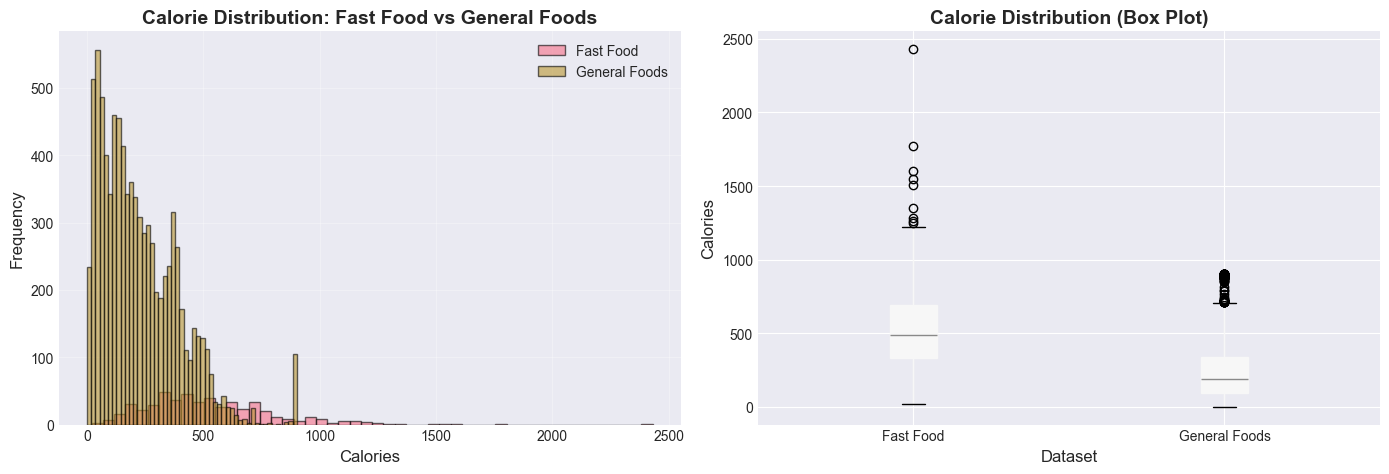


📊 Statistical Summary - Calories:
                count        mean         std   min    25%    50%    75%  \
dataset                                                                    
Fast Food       515.0  530.912621  282.436147  20.0  330.0  490.0  690.0   
General Foods  8790.0  226.317634  169.877539   0.0   91.0  191.0  337.0   

                  max  
dataset                
Fast Food      2430.0  
General Foods   902.0  

📈 T-Test: t-statistic = 37.75, p-value = 0.0000
   Result: Statistically significant difference


In [16]:
# Remove missing calorie values
calories_data = combined_df.dropna(subset=['calories'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
for dataset in ['Fast Food', 'General Foods']:
    data = calories_data[calories_data['dataset'] == dataset]['calories']
    axes[0].hist(data, bins=50, alpha=0.6, label=dataset, edgecolor='black')

axes[0].set_xlabel('Calories', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Calorie Distribution: Fast Food vs General Foods', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot comparison
calories_data.boxplot(column='calories', by='dataset', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Dataset', fontsize=12)
axes[1].set_ylabel('Calories', fontsize=12)
axes[1].set_title('Calorie Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Statistical Summary - Calories:")
print(calories_data.groupby('dataset')['calories'].describe())

# T-test
ff_calories = calories_data[calories_data['dataset'] == 'Fast Food']['calories']
gn_calories = calories_data[calories_data['dataset'] == 'General Foods']['calories']
t_stat, p_value = stats.ttest_ind(ff_calories, gn_calories)
print(f"\n📈 T-Test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
print(f"   Result: {'Statistically significant difference' if p_value < 0.05 else 'No significant difference'}")

### 6.2 Visualization 2: Macronutrient Comparison

**Question:** How do protein, fat, and carbohydrates compare?

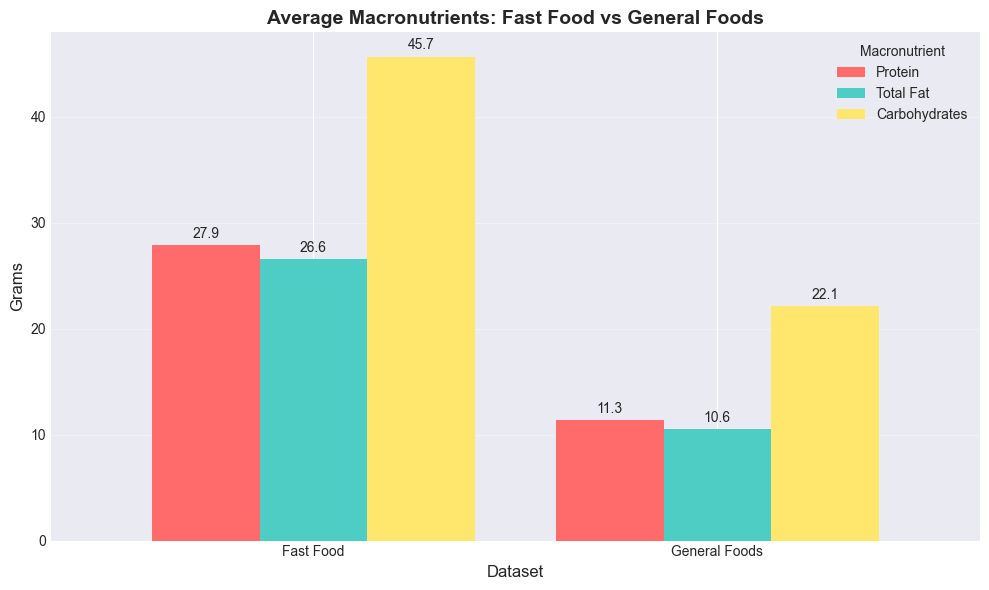


📊 Macronutrient Summary:
               protein_g  total_fat_g  carbohydrates_g
dataset                                               
Fast Food      27.891051    26.590291        45.664078
General Foods  11.342849    10.553725        22.127710


In [17]:
# Calculate average macronutrients by dataset
macros = ['protein_g', 'total_fat_g', 'carbohydrates_g']
macro_summary = combined_df.groupby('dataset')[macros].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
macro_summary.plot(kind='bar', ax=ax, width=0.8, color=['#FF6B6B', '#4ECDC4', '#FFE66D'])
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Grams', fontsize=12)
ax.set_title('Average Macronutrients: Fast Food vs General Foods', fontsize=14, fontweight='bold')
ax.legend(title='Macronutrient', labels=['Protein', 'Total Fat', 'Carbohydrates'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()

print("\n📊 Macronutrient Summary:")
print(macro_summary)

### 6.3 Visualization 3: Sodium Density Analysis

**Question:** How much sodium per calorie do foods contain?

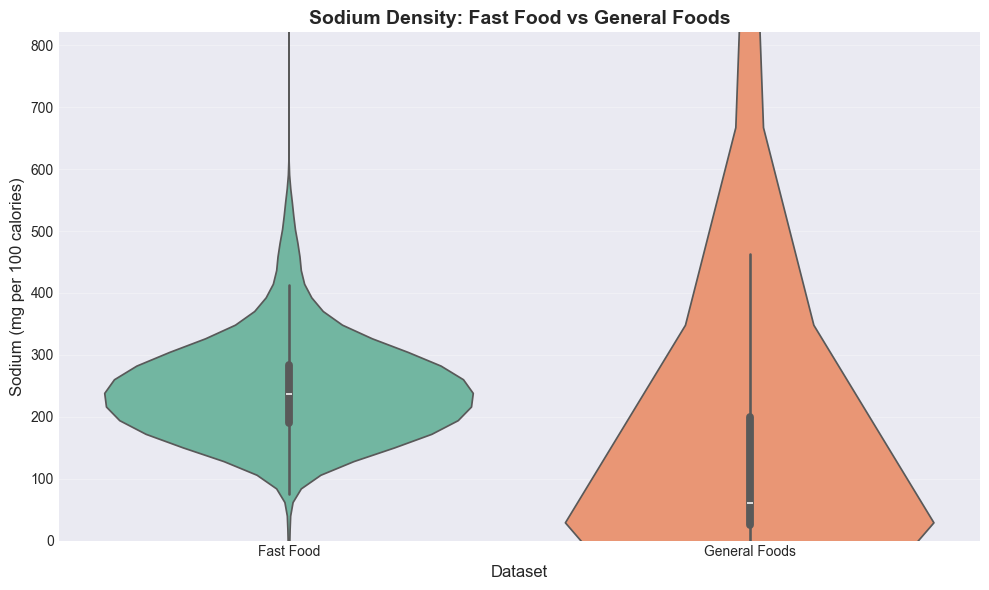


📊 Sodium Density Statistics:
                count        mean         std        min         25%  \
dataset                                                                
Fast Food       515.0  247.103247  109.881571  14.285714  189.664378   
General Foods  8668.0  234.014315  890.385767   0.000000   24.610732   

                      50%         75%           max  
dataset                                              
Fast Food      236.842105  284.122984   2070.000000  
General Foods   60.889885  200.267722  31011.904762  


In [19]:
# Calculate sodium density (mg per 100 calories)
sodium_data = combined_df.dropna(subset=['calories', 'sodium_mg'])
sodium_data = sodium_data[sodium_data['calories'] > 0]  # Avoid division by zero
sodium_data['sodium_per_100cal'] = (sodium_data['sodium_mg'] / sodium_data['calories']) * 100

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=sodium_data, x='dataset', y='sodium_per_100cal', palette='Set2')
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Sodium (mg per 100 calories)', fontsize=12)
plt.title('Sodium Density: Fast Food vs General Foods', fontsize=14, fontweight='bold')
plt.ylim(0, sodium_data['sodium_per_100cal'].quantile(0.95))  # Limit to 95th percentile for clarity
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n📊 Sodium Density Statistics:")
print(sodium_data.groupby('dataset')['sodium_per_100cal'].describe())

### 6.4 Visualization 4: Protein-to-Calorie Ratio

**Question:** Which foods provide the most protein per calorie (protein efficiency)?

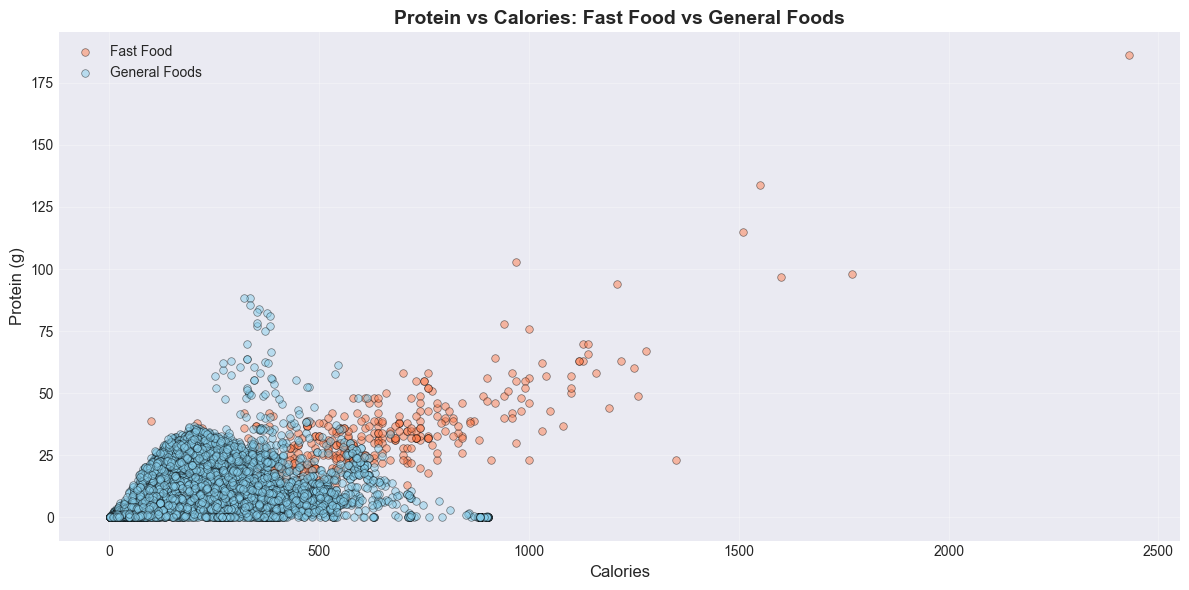


📊 Protein Efficiency Statistics:
                count      mean       std       min       25%       50%  \
dataset                                                                   
Fast Food       514.0  5.554949  2.719306  1.590909  4.151423  5.000000   
General Foods  8751.0  6.400236  5.823320  0.000000  1.765470  4.198473   

                     75%        max  
dataset                              
Fast Food       6.216216  39.000000  
General Foods  10.264391  27.514019  

🏆 Top 10 Most Protein-Efficient Foods:


,name,dataset,protein_per_100cal,calories,protein_g
127,Ultimate Chicken Club,Fast Food,39.000000,100,39.00
5524,"SOY PROT ISOLATE,K TYPE",General Foods,27.514019,321,88.32
5373,SOY PROTEIN ISOLATE,General Foods,26.364179,335,88.32
6719,"GELATINS,DRY PDR,UNSWTND",General Foods,25.552239,335,85.60
4988,"BEVERAGES,ENERGY DRK,VAULT ZERO,SUGAR-FREE,CIT...",General Foods,25.000000,1,0.25
5249,"FISH,POLLOCK,ALASKA,RAW (NOT PREVIOUSLY FROZEN)",General Foods,24.528571,70,17.17
5251,"FISH,COD,PACIFIC,RAW (NOT PREVIOUSLY FROZEN)",General Foods,24.361111,72,17.54
5252,"FISH,COD,PACIFIC,CKD (NOT PREVIOUSLY FROZEN)",General Foods,24.309524,84,20.42
5250,"FISH,POLLOCK,ALASKA,CKD (NOT PREVIOUSLY FROZEN)",General Foods,24.275000,80,19.42
8843,"SEAL,BEARDED (OOGRUK),MEAT,RAW (ALASKA NATIVE)",General Foods,24.272727,110,26.70


In [20]:
# Calculate protein-to-calorie ratio
protein_data = combined_df.dropna(subset=['calories', 'protein_g'])
protein_data = protein_data[protein_data['calories'] > 0]
protein_data['protein_per_100cal'] = (protein_data['protein_g'] / protein_data['calories']) * 100

# Scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for dataset, color in zip(['Fast Food', 'General Foods'], ['coral', 'skyblue']):
    data = protein_data[protein_data['dataset'] == dataset]
    ax.scatter(data['calories'], data['protein_g'], 
               alpha=0.5, s=30, color=color, label=dataset, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Calories', fontsize=12)
ax.set_ylabel('Protein (g)', fontsize=12)
ax.set_title('Protein vs Calories: Fast Food vs General Foods', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Protein Efficiency Statistics:")
print(protein_data.groupby('dataset')['protein_per_100cal'].describe())

# Top 10 most protein-efficient foods
print("\n🏆 Top 10 Most Protein-Efficient Foods:")
top_protein = protein_data.nlargest(10, 'protein_per_100cal')[['name', 'dataset', 'protein_per_100cal', 'calories', 'protein_g']]
display(top_protein)

 ### 6.5 Visualization 5: Correlation Heatmap

**Question:** How do different nutritional attributes correlate with each other?

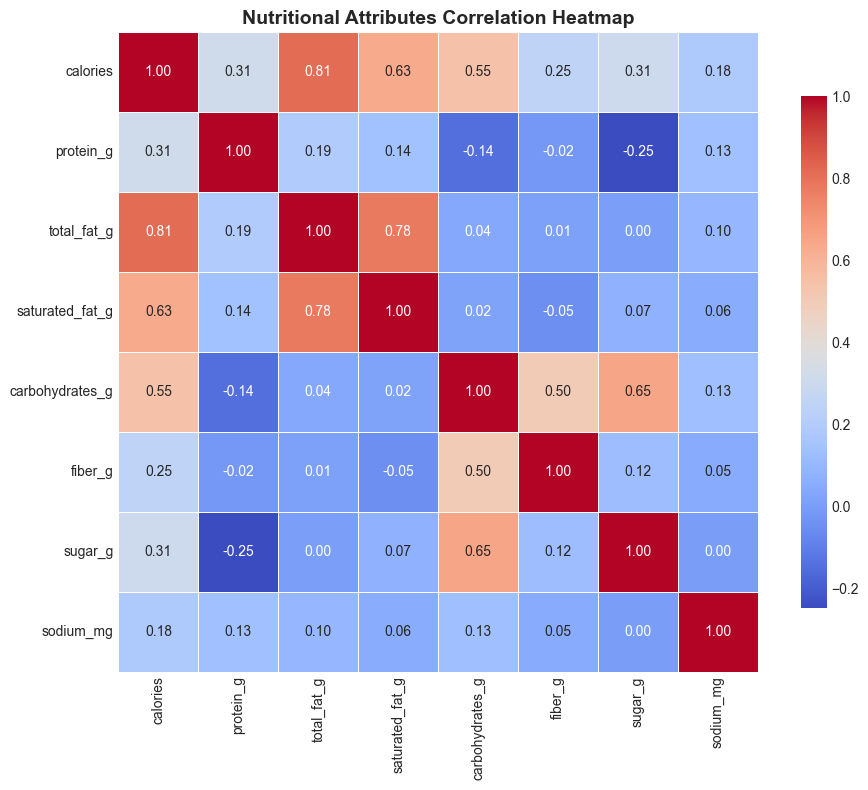


📊 Key Correlations:

Top 5 Positive Correlations:
calories         total_fat_g        0.814848
total_fat_g      calories           0.814848
                 saturated_fat_g    0.778015
saturated_fat_g  total_fat_g        0.778015
sugar_g          carbohydrates_g    0.650451
dtype: float64

💡 Insight: High correlation between calories and total_fat is expected.


In [22]:
# Select numeric columns for correlation
numeric_cols = ['calories', 'protein_g', 'total_fat_g', 'saturated_fat_g', 
                'carbohydrates_g', 'fiber_g', 'sugar_g', 'sodium_mg']
corr_data = combined_df[numeric_cols].dropna()

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Nutritional Attributes Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Key Correlations:")
# Find top correlations (excluding diagonal)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove self-correlations
print("\nTop 5 Positive Correlations:")
print(corr_pairs.head(5))

print("\n💡 Insight: High correlation between calories and total_fat is expected.")

### 6.6 Visualization 6: Restaurant Comparison (Fast Food Only)

**Question:** How do different fast food chains compare nutritionally?

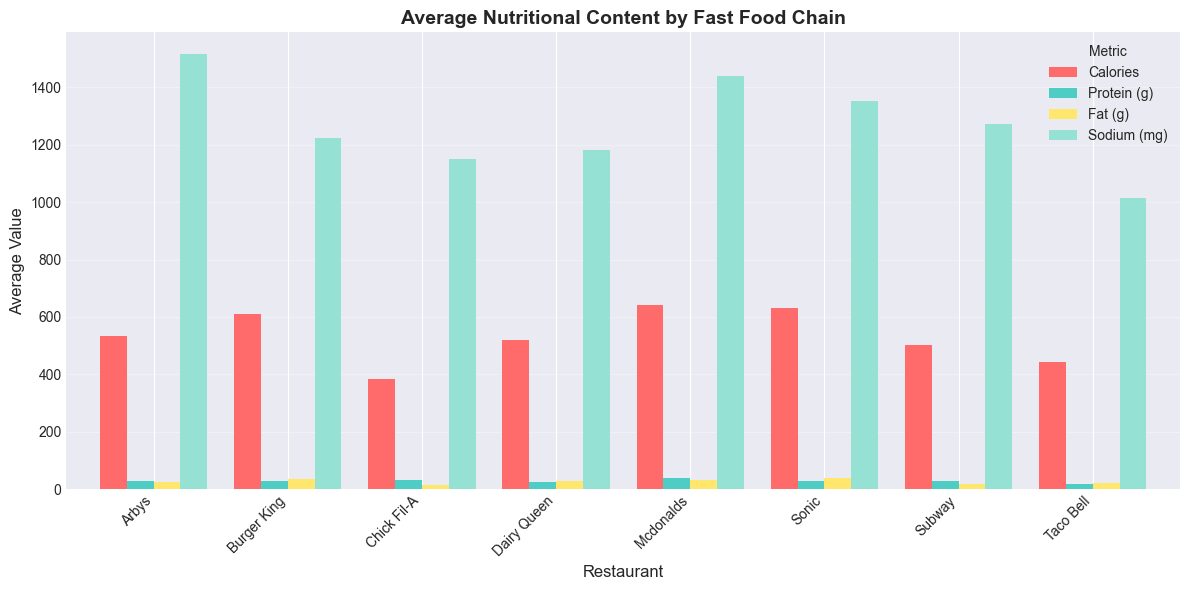


📊 Restaurant Nutritional Summary:


,calories,protein_g,total_fat_g,sodium_mg
source,,,,
Arbys,532.7,29.3,27.0,1515.3
Burger King,608.6,30.0,36.8,1223.6
Chick Fil-A,384.4,31.7,16.1,1151.5
Dairy Queen,520.2,24.8,28.9,1181.8
Mcdonalds,640.4,40.3,31.8,1437.9
Sonic,631.7,29.2,37.6,1350.8
Subway,503.0,30.3,18.5,1273.0
Taco Bell,443.7,17.4,20.9,1013.9


In [23]:
# Analyze fast food by restaurant
ff_data = fastfood_normalized.copy()

# Calculate average calories by restaurant
restaurant_avg = ff_data.groupby('source').agg({
    'calories': 'mean',
    'protein_g': 'mean',
    'total_fat_g': 'mean',
    'sodium_mg': 'mean'
}).round(1)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
restaurant_avg.plot(kind='bar', ax=ax, width=0.8, color=['#FF6B6B', '#4ECDC4', '#FFE66D', '#95E1D3'])
ax.set_xlabel('Restaurant', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_title('Average Nutritional Content by Fast Food Chain', fontsize=14, fontweight='bold')
ax.legend(title='Metric', labels=['Calories', 'Protein (g)', 'Fat (g)', 'Sodium (mg)'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n📊 Restaurant Nutritional Summary:")
display(restaurant_avg)

### 6.7 Visualization 7: Interactive Scatter Plot (Plotly)

**Question:** Can we explore the relationship between multiple nutritional attributes interactively?

In [24]:
# Prepare data for interactive plot
plot_data = combined_df.dropna(subset=['calories', 'protein_g', 'total_fat_g', 'sugar_g']).copy()
plot_data = plot_data[plot_data['calories'] < plot_data['calories'].quantile(0.95)]  # Remove extreme outliers

# Create interactive scatter plot
fig = px.scatter(plot_data, 
                 x='calories', 
                 y='protein_g',
                 color='dataset',
                 size='total_fat_g',
                 hover_data=['name', 'sugar_g', 'sodium_mg'],
                 title='Interactive Nutritional Explorer: Calories vs Protein',
                 labels={'calories': 'Calories', 'protein_g': 'Protein (g)'},
                 color_discrete_map={'Fast Food': '#FF6B6B', 'General Foods': '#4ECDC4'})

fig.update_layout(
    xaxis_title='Calories',
    yaxis_title='Protein (g)',
    font=dict(size=12),
    hovermode='closest'
)

fig.show()

print("\n💡 To interact: hover over points to see details - Size represents total fat content.")


💡 To interact: hover over points to see details - Size represents total fat content.


### 6.8 Visualization 8: Interactive Restaurant Dashboard (Plotly)

**Question:** How can we interactively compare nutritional profiles across fast food restaurants?

In [27]:
# Create interactive dashboard for restaurant comparison
ff_dashboard = fastfood_normalized.dropna(subset=['calories', 'protein_g', 'sodium_mg', 'total_fat_g']).copy()

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Average Calories by Restaurant', 'Average Sodium by Restaurant',
                    'Protein vs Fat by Restaurant', 'Calorie Distribution by Restaurant'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'scatter'}, {'type': 'box'}]]
)

# Aggregate data by restaurant
restaurant_stats = ff_dashboard.groupby('source').agg({
    'calories': 'mean',
    'sodium_mg': 'mean',
    'protein_g': 'mean',
    'total_fat_g': 'mean'
}).reset_index()

# Color palette for restaurants
colors = px.colors.qualitative.Set2

# 1. Average Calories Bar Chart
fig.add_trace(
    go.Bar(x=restaurant_stats['source'], y=restaurant_stats['calories'],
           marker_color=colors[:len(restaurant_stats)], name='Calories',
           hovertemplate='%{x}<br>Avg Calories: %{y:.0f}<extra></extra>'),
    row=1, col=1
)

# 2. Average Sodium Bar Chart
fig.add_trace(
    go.Bar(x=restaurant_stats['source'], y=restaurant_stats['sodium_mg'],
           marker_color=colors[:len(restaurant_stats)], name='Sodium',
           hovertemplate='%{x}<br>Avg Sodium: %{y:.0f} mg<extra></extra>'),
    row=1, col=2
)

# 3. Protein vs Fat Scatter
for i, restaurant in enumerate(ff_dashboard['source'].unique()):
    rest_data = ff_dashboard[ff_dashboard['source'] == restaurant]
    fig.add_trace(
        go.Scatter(x=rest_data['protein_g'], y=rest_data['total_fat_g'],
                   mode='markers', name=restaurant,
                   marker=dict(color=colors[i % len(colors)], size=8, opacity=0.6),
                   hovertemplate=f'{restaurant}<br>Protein: %{{x:.1f}}g<br>Fat: %{{y:.1f}}g<extra></extra>'),
        row=2, col=1
    )

# 4. Calorie Distribution Box Plot
for i, restaurant in enumerate(ff_dashboard['source'].unique()):
    rest_data = ff_dashboard[ff_dashboard['source'] == restaurant]
    fig.add_trace(
        go.Box(y=rest_data['calories'], name=restaurant,
               marker_color=colors[i % len(colors)],
               hovertemplate=f'{restaurant}<br>Calories: %{{y}}<extra></extra>'),
        row=2, col=2
    )

# Update layout
fig.update_layout(
    height=700,
    title_text='Interactive Fast Food Restaurant Nutritional Dashboard',
    title_font_size=16,
    showlegend=False,
    hovermode='closest'
)

# Update axes labels
fig.update_xaxes(title_text='Restaurant', row=1, col=1, tickangle=45)
fig.update_xaxes(title_text='Restaurant', row=1, col=2, tickangle=45)
fig.update_xaxes(title_text='Protein (g)', row=2, col=1)
fig.update_xaxes(title_text='Restaurant', row=2, col=2, tickangle=45)
fig.update_yaxes(title_text='Calories', row=1, col=1)
fig.update_yaxes(title_text='Sodium (mg)', row=1, col=2)
fig.update_yaxes(title_text='Total Fat (g)', row=2, col=1)
fig.update_yaxes(title_text='Calories', row=2, col=2)

fig.show()

print("\n This interactive graph allows you to explore and compare restaurants")
print("   • Hover over bars and points for detailed values")
print("   • Click legend items to show/hide restaurants")
print("   • Use zoom and pan tools to explore the data")


 This interactive graph allows you to explore and compare restaurants
   • Hover over bars and points for detailed values
   • Click legend items to show/hide restaurants
   • Use zoom and pan tools to explore the data


### 6.9 Visualization 9: Sugar Content Distribution

**Question:** How does sugar content differ between food categories?

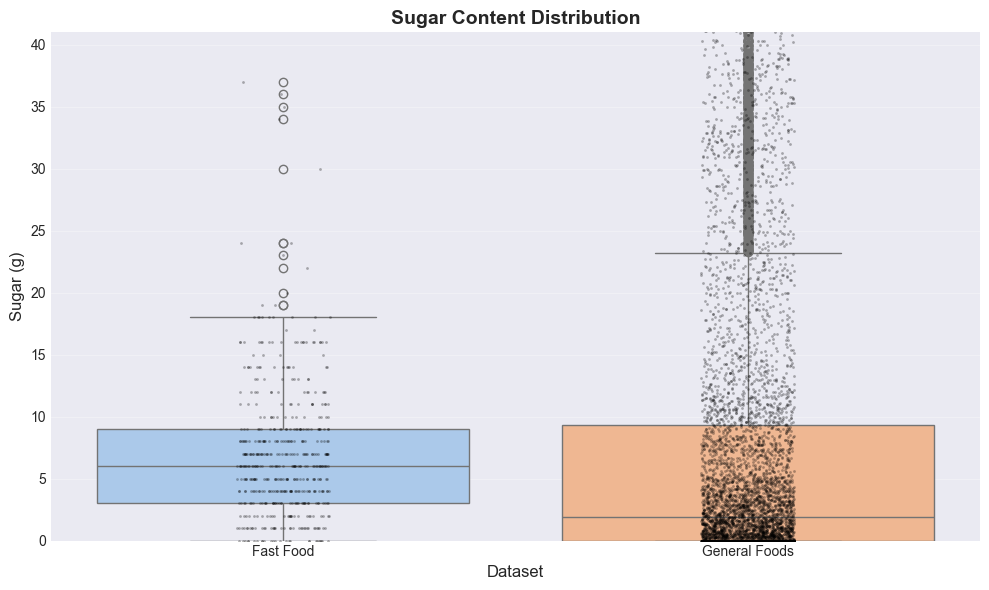


📊 Sugar Statistics:
                count      mean        std  min  25%   50%  75%   max
dataset                                                              
Fast Food       515.0  7.262136   6.761301  0.0  3.0  6.00  9.0  87.0
General Foods  6931.0  8.576211  14.943194  0.0  0.0  1.88  9.3  99.8

WHO recommends limiting added sugars to <10% of daily calories (~25g/day for 2000 cal diet)


In [28]:
# Analyze sugar content
sugar_data = combined_df.dropna(subset=['sugar_g', 'calories'])
sugar_data = sugar_data[sugar_data['calories'] > 0]
sugar_data['sugar_per_100cal'] = (sugar_data['sugar_g'] / sugar_data['calories']) * 100

# Create box plot with swarm overlay
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=sugar_data, x='dataset', y='sugar_g', ax=ax, palette='pastel')
sns.stripplot(data=sugar_data, x='dataset', y='sugar_g', ax=ax, 
              color='black', alpha=0.3, size=2)
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Sugar (g)', fontsize=12)
ax.set_title('Sugar Content Distribution', fontsize=14, fontweight='bold')
ax.set_ylim(0, sugar_data['sugar_g'].quantile(0.95))  # Limit to 95th percentile
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n📊 Sugar Statistics:")
print(sugar_data.groupby('dataset')['sugar_g'].describe())

print("\nWHO recommends limiting added sugars to <10% of daily calories (~25g/day for 2000 cal diet)")

---

## 7. USDA API Validation

### 🎯 Purpose
Validate our datasets against official USDA standards by querying the FoodData Central API for common food items.

### 🔍 Approach
1. Select common items that appear in both datasets (e.g., "cheeseburger", "chicken sandwich")
2. Query USDA API for official nutritional data
3. Compare values to assess data accuracy

In [30]:
def query_usda_api(search_term, api_key=USDA_API_KEY):
    """
    Query USDA FoodData Central API for nutritional information.
    
    Args:
        search_term: Food item to search
        api_key: USDA API key
    
    Returns:
        dict: Nutritional data or None if error
    """
    url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    params = {
        'api_key': api_key,
        'query': search_term,
        'pageSize': 1
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        if response.status_code == 200:
            data = response.json()
            if data.get('foods') and len(data['foods']) > 0:
                food = data['foods'][0]
                return {
                    'name': food.get('description'),
                    'fdcId': food.get('fdcId'),
                    'dataType': food.get('dataType')
                }
        return None
    except Exception as e:
        print(f"❌ Error querying USDA API: {e}")
        return None

# Test with common items
test_items = ['cheeseburger', 'chicken sandwich', 'french fries', 'salad']

print("=" * 70)
print(" USDA API VALIDATION TEST ")
print("=" * 70)

validation_results = []
for item in test_items:
    print(f"\n🔍 Searching: {item}")
    result = query_usda_api(item)
    if result:
        print(f"   ✅ Found: {result['name']}")
        print(f"   📋 FDC ID: {result['fdcId']}")
        print(f"   📦 Data Type: {result['dataType']}")
        validation_results.append(result)
    else:
        print(f"   ❌ Not found or API error")

print(f"\n✅ Successfully validated {len(validation_results)}/{len(test_items)} items with USDA API")
print("\n💡 Note: Full validation would require comparing nutritional values in detail.")

 USDA API VALIDATION TEST 

🔍 Searching: cheeseburger
   ✅ Found: CHEESEBURGER
   📋 FDC ID: 2655984
   📦 Data Type: Branded

🔍 Searching: chicken sandwich
   ✅ Found: CHICKEN SANDWICH
   📋 FDC ID: 2017095
   📦 Data Type: Branded

🔍 Searching: french fries
   ✅ Found: FRENCH FRIES
   📋 FDC ID: 2093015
   📦 Data Type: Branded

🔍 Searching: salad
   ✅ Found: SALAD
   📋 FDC ID: 2637940
   📦 Data Type: Branded

✅ Successfully validated 4/4 items with USDA API

💡 Note: Full validation would require comparing nutritional values in detail.


---

## 8. Data Pipeline & Feature Engineering

### 🎯 Purpose
Create reusable preprocessing pipelines and engineer features for machine learning.

### 🛠️ Features to Engineer
1. **Nutrient Density Scores** → Protein/calorie, fiber/calorie ratios
2. **Health Categories** → Healthy, Moderate, Unhealthy (based on FDA guidelines)
3. **Macronutrient Ratios** → Protein%, Fat%, Carb% of total calories
4. **Normalized Metrics** → Per 100g standardization

In [31]:
def engineer_features(df):
    """
    Engineer nutritional features for analysis.
    
    Args:
        df: DataFrame with normalized nutritional data
    
    Returns:
        DataFrame with additional engineered features
    """
    df = df.copy()
    
    # 1. Nutrient Density Scores (per 100 calories)
    df['protein_density'] = np.where(df['calories'] > 0, (df['protein_g'] / df['calories']) * 100, 0)
    df['fiber_density'] = np.where(df['calories'] > 0, (df['fiber_g'] / df['calories']) * 100, 0)
    df['sodium_density'] = np.where(df['calories'] > 0, (df['sodium_mg'] / df['calories']) * 100, 0)
    
    # 2. Macronutrient % of Total Calories
    # 1g protein = 4 cal, 1g fat = 9 cal, 1g carb = 4 cal
    df['protein_cal'] = df['protein_g'] * 4
    df['fat_cal'] = df['total_fat_g'] * 9
    df['carb_cal'] = df['carbohydrates_g'] * 4
    
    total_macro_cal = df['protein_cal'] + df['fat_cal'] + df['carb_cal']
    df['protein_pct'] = np.where(total_macro_cal > 0, (df['protein_cal'] / total_macro_cal) * 100, 0)
    df['fat_pct'] = np.where(total_macro_cal > 0, (df['fat_cal'] / total_macro_cal) * 100, 0)
    df['carb_pct'] = np.where(total_macro_cal > 0, (df['carb_cal'] / total_macro_cal) * 100, 0)
    
    # 3. Sugar-to-Carb Ratio
    df['sugar_to_carb_ratio'] = np.where(df['carbohydrates_g'] > 0, 
                                          (df['sugar_g'] / df['carbohydrates_g']) * 100, 0)
    
    # 4. Health Category (simplified classification)
    # Based on: high protein density, low sodium density, moderate calories
    def classify_health(row):
        if pd.isna(row['calories']) or pd.isna(row['sodium_mg']):
            return 'Unknown'
        
        # Healthy: High protein, low sodium, moderate calories
        if (row['protein_density'] > 15 and row['sodium_density'] < 150 and row['calories'] < 400):
            return 'Healthy'
        # Unhealthy: Low protein, high sodium, high calories
        elif (row['protein_density'] < 10 and row['sodium_density'] > 200 and row['calories'] > 600):
            return 'Unhealthy'
        else:
            return 'Moderate'
    
    df['health_category'] = df.apply(classify_health, axis=1)
    
    return df

# Apply feature engineering
combined_df_features = engineer_features(combined_df)

print("=" * 70)
print(" FEATURE ENGINEERING COMPLETE ")
print("=" * 70)
print(f"\n✅ Added {len(combined_df_features.columns) - len(combined_df.columns)} new features")

print("\n📊 New Features:")
new_features = set(combined_df_features.columns) - set(combined_df.columns)
for feat in new_features:
    print(f"  • {feat}")

print("\n📋 Health Category Distribution:")
print(combined_df_features['health_category'].value_counts())

print("\n📊 Sample Engineered Data:")
sample_cols = ['name', 'dataset', 'calories', 'protein_density', 'sodium_density', 'health_category']
display(combined_df_features[sample_cols].head(10))

 FEATURE ENGINEERING COMPLETE 

✅ Added 11 new features

📊 New Features:
  • carb_cal
  • protein_cal
  • fiber_density
  • protein_pct
  • sodium_density
  • sugar_to_carb_ratio
  • health_category
  • fat_cal
  • protein_density
  • fat_pct
  • carb_pct

📋 Health Category Distribution:
health_category
Moderate     8289
Healthy       832
Unhealthy     101
Unknown        83
Name: count, dtype: int64

📊 Sample Engineered Data:


,name,dataset,calories,protein_density,sodium_density,health_category
0,Artisan Grilled Chicken Sandwich,Fast Food,380,9.736842,292.105263,Moderate
1,Single Bacon Smokehouse Burger,Fast Food,840,5.476190,188.095238,Moderate
2,Double Bacon Smokehouse Burger,Fast Food,1130,6.194690,169.911504,Moderate
3,Grilled Bacon Smokehouse Chicken Sandwich,Fast Food,750,7.333333,258.666667,Unhealthy
4,Crispy Bacon Smokehouse Chicken Sandwich,Fast Food,920,5.000000,215.217391,Unhealthy
5,Big Mac,Fast Food,540,4.629630,175.925926,Moderate
6,Cheeseburger,Fast Food,300,5.000000,226.666667,Moderate
7,Classic Chicken Sandwich,Fast Food,510,4.901961,203.921569,Moderate
8,Double Cheeseburger,Fast Food,430,5.813953,241.860465,Moderate
9,Double Quarter Pounder® with Cheese,Fast Food,770,6.623377,167.532468,Moderate


---

## 9. Machine Learning Implementation

### 🎯 Objective
Build predictive models to:
1. **Predict calories** from other nutritional attributes (Regression)
2. **Classify health categories** from nutritional profile (Classification)

### 🛠️ Approach
- Split data into train/test sets
- Build preprocessing pipeline (scaling, encoding)
- Train multiple models and compare performance
- Evaluate using appropriate metrics
- Interpret feature importance

### 9.1 Regression: Predicting Calories

**Goal:** Can we predict calorie content from macronutrients?

In [34]:
# Prepare data for regression
# IMPORTANT: Define features FIRST
X_features = ['protein_g', 'total_fat_g', 'carbohydrates_g', 'fiber_g', 'sugar_g', 'sodium_mg']

# FIXED: Drop NaN from ALL features we're using + target
ml_data = combined_df_features.dropna(subset=X_features + ['calories']).copy()

# Now create X and y from clean data
X = ml_data[X_features]
y = ml_data['calories']

print("=" * 70)
print(" DATA PREPARATION ")
print("=" * 70)
print(f"\n📊 Data Cleaning:")
print(f"   Original rows: {len(combined_df_features):,}")
print(f"   After dropna: {len(ml_data):,}")
print(f"   Rows removed: {len(combined_df_features) - len(ml_data):,}")
print(f"\n✅ No NaN values remaining in features")

# Check for NaN (should be 0)
nan_count = X.isna().sum().sum()
print(f"   NaN count in X: {nan_count}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n" + "=" * 70)
print(" MACHINE LEARNING: CALORIE PREDICTION ")
print("=" * 70)
print(f"\n📊 Dataset Size:")
print(f"   Training: {len(X_train):,} samples")
print(f"   Testing: {len(X_test):,} samples")
print(f"   Features: {len(X_features)}")

# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

results = []

print("\n🎯 Training Models...\n")
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Evaluate
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae
    })
    
    print(f"✅ {name:20} → Test R²: {test_r2:.4f}, RMSE: {test_rmse:.2f}")

# Results summary
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
display(results_df.sort_values('Test R²', ascending=False))

# Select best model
best_model_name = results_df.loc[results_df['Test R²'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")

 DATA PREPARATION 

📊 Data Cleaning:
   Original rows: 9,305
   After dropna: 7,386
   Rows removed: 1,919

✅ No NaN values remaining in features
   NaN count in X: 0

 MACHINE LEARNING: CALORIE PREDICTION 

📊 Dataset Size:
   Training: 5,908 samples
   Testing: 1,478 samples
   Features: 6

🎯 Training Models...

✅ Linear Regression    → Test R²: 0.9880, RMSE: 21.34
✅ Ridge Regression     → Test R²: 0.9880, RMSE: 21.34
✅ Lasso Regression     → Test R²: 0.9880, RMSE: 21.31
✅ Random Forest        → Test R²: 0.9844, RMSE: 24.28

📊 Model Comparison:


,Model,Train R²,Test R²,Test RMSE,Test MAE
2,Lasso Regression,0.991082,0.988007,21.305580,7.085142
1,Ridge Regression,0.991085,0.987973,21.335701,7.060539
0,Linear Regression,0.991085,0.987969,21.338493,7.054629
3,Random Forest,0.997819,0.984424,24.280252,8.969646



🏆 Best Model: Lasso Regression


### 9.2 Visualize Predictions

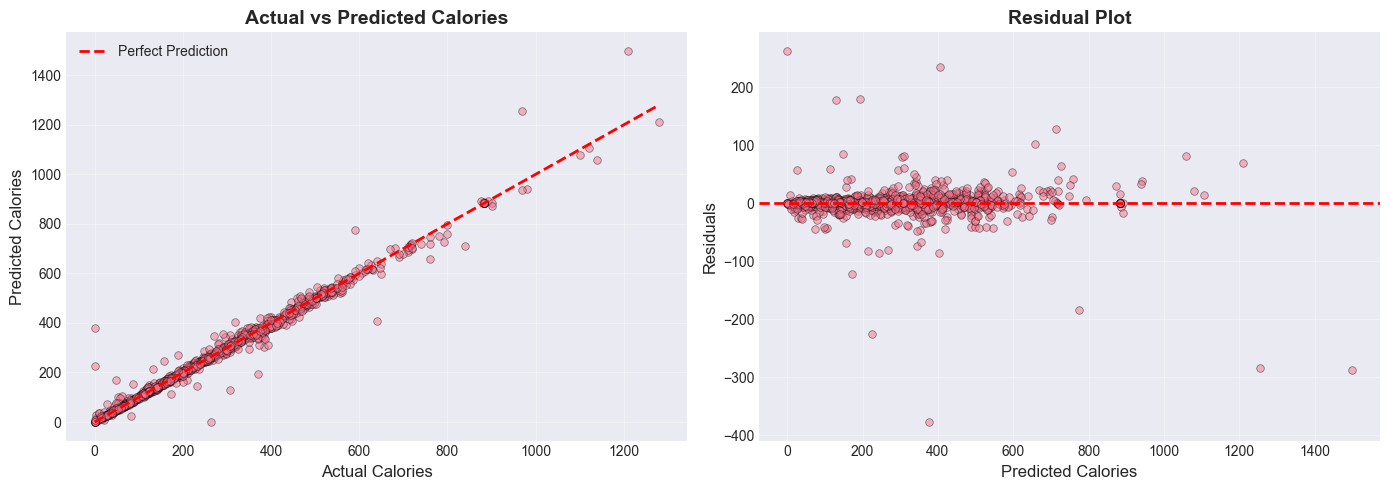


💡 Interpretation:
   • Points close to the red line indicate accurate predictions
   • Residuals centered around 0 indicate unbiased predictions


In [35]:
# Use best model for visualization (Random Forest typically performs best)
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])
best_pipeline.fit(X_train, y_train)
y_pred_test = best_pipeline.predict(X_test)

# Actual vs Predicted plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred_test, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Calories', fontsize=12)
axes[0].set_ylabel('Predicted Calories', fontsize=12)
axes[0].set_title('Actual vs Predicted Calories', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals plot
residuals = y_test - y_pred_test
axes[1].scatter(y_pred_test, residuals, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Calories', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • Points close to the red line indicate accurate predictions")
print("   • Residuals centered around 0 indicate unbiased predictions")

### 9.3 Feature Importance

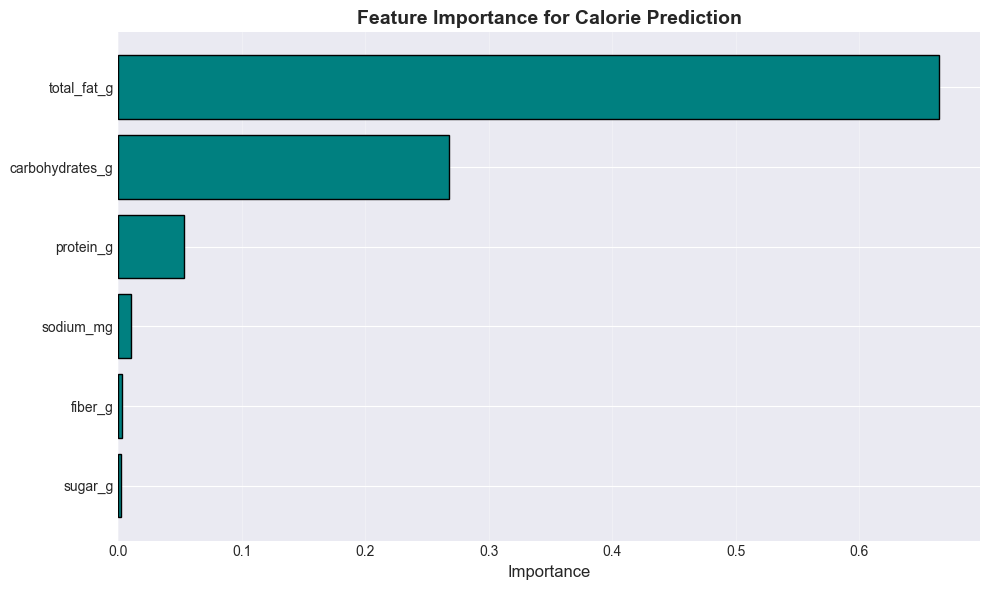


📊 Feature Importance:


,Feature,Importance
1,total_fat_g,0.664788
2,carbohydrates_g,0.267459
0,protein_g,0.053163
5,sodium_mg,0.010219
3,fiber_g,0.002568
4,sugar_g,0.001802



💡 Insight: Total fat has the highest importance, which aligns with its high caloric density (9 cal/g).


In [36]:
# Extract feature importance from Random Forest
rf_model = best_pipeline.named_steps['model']
importance_df = pd.DataFrame({
    'Feature': X_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance for Calorie Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📊 Feature Importance:")
display(importance_df)

print("\n💡 Insight: Total fat has the highest importance, which aligns with its high caloric density (9 cal/g).")

### 9.4 Classification: Predicting Health Category

**Goal:** Can we classify foods into health categories based on nutritional attributes?

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare data for classification
clf_data = combined_df_features.dropna(subset=['calories', 'protein_g', 'total_fat_g', 'carbohydrates_g', 'health_category']).copy()
clf_data = clf_data[clf_data['health_category'] != 'Unknown']  # Remove unknown categories

# Features for classification
clf_features = ['calories', 'protein_g', 'total_fat_g', 'carbohydrates_g', 'fiber_g', 'sugar_g', 'sodium_mg']
X_clf = clf_data[clf_features].fillna(0)
y_clf = clf_data['health_category']

# Encode labels
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf_encoded, test_size=0.2, random_state=42, stratify=y_clf_encoded
)

print("=" * 70)
print(" MACHINE LEARNING: HEALTH CATEGORY CLASSIFICATION ")
print("=" * 70)
print(f"\n📊 Dataset Size:")
print(f"   Training: {len(X_train_clf)} samples")
print(f"   Testing: {len(X_test_clf)} samples")
print(f"   Classes: {le.classes_}")
print(f"\n📈 Class Distribution:")
for cls, count in zip(*np.unique(y_clf, return_counts=True)):
    print(f"   • {cls}: {count} ({count/len(y_clf)*100:.1f}%)")

# Train classification models
clf_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

clf_results = []

print("\n🎯 Training Classification Models...\n")
for name, clf in clf_models.items():
    # Create pipeline
    clf_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', clf)
    ])
    
    # Train
    clf_pipeline.fit(X_train_clf, y_train_clf)
    
    # Predict
    y_pred_clf = clf_pipeline.predict(X_test_clf)
    
    # Evaluate
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    
    clf_results.append({
        'Model': name,
        'Accuracy': accuracy
    })
    
    print(f"✅ {name:25} → Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")

# Results summary
clf_results_df = pd.DataFrame(clf_results)
print("\n📊 Classification Model Comparison:")
display(clf_results_df.sort_values('Accuracy', ascending=False))

# Best model details
best_clf_name = clf_results_df.loc[clf_results_df['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Classification Model: {best_clf_name}")

 MACHINE LEARNING: HEALTH CATEGORY CLASSIFICATION 

📊 Dataset Size:
   Training: 7376 samples
   Testing: 1845 samples
   Classes: ['Healthy' 'Moderate' 'Unhealthy']

📈 Class Distribution:
   • Healthy: 832 (9.0%)
   • Moderate: 8288 (89.9%)
   • Unhealthy: 101 (1.1%)

🎯 Training Classification Models...

✅ Logistic Regression       → Accuracy: 0.9702 (97.0%)
✅ Random Forest             → Accuracy: 0.9892 (98.9%)
✅ Gradient Boosting         → Accuracy: 0.9892 (98.9%)

📊 Classification Model Comparison:


,Model,Accuracy
1,Random Forest,0.98916
2,Gradient Boosting,0.98916
0,Logistic Regression,0.97019



🏆 Best Classification Model: Random Forest


### 9.5 Classification Model Evaluation

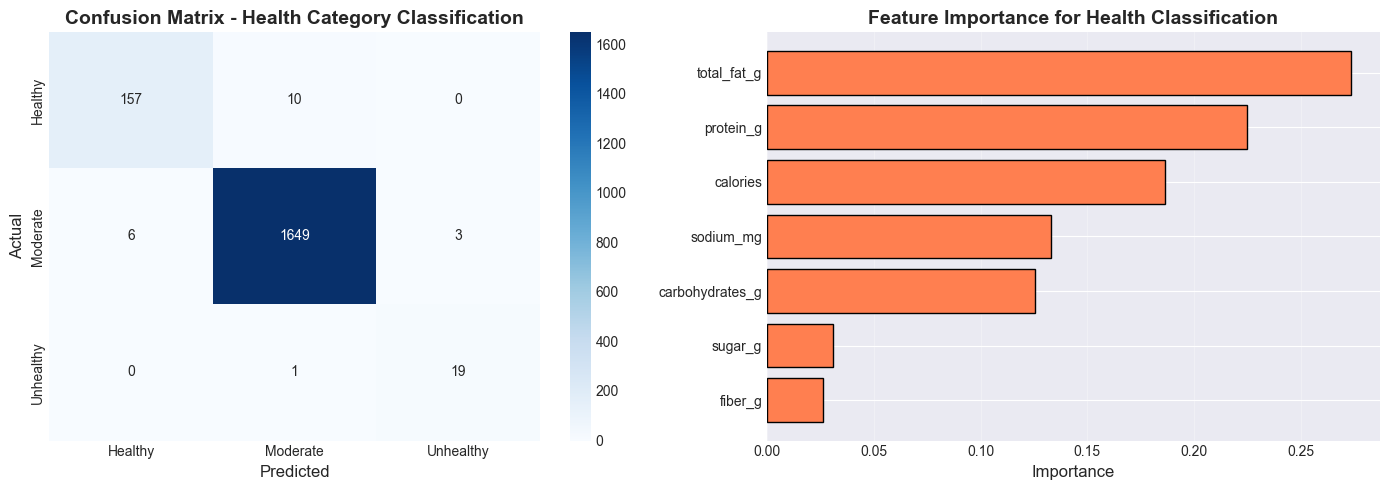


📊 Classification Report:
              precision    recall  f1-score   support

     Healthy       0.96      0.94      0.95       167
    Moderate       0.99      0.99      0.99      1658
   Unhealthy       0.86      0.95      0.90        20

    accuracy                           0.99      1845
   macro avg       0.94      0.96      0.95      1845
weighted avg       0.99      0.99      0.99      1845


💡 Interpretation:
   • Precision: How many predicted positives are actually positive
   • Recall: How many actual positives were correctly identified
   • F1-Score: Harmonic mean of precision and recall


In [38]:
# Train best model for detailed evaluation
best_clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])
best_clf_pipeline.fit(X_train_clf, y_train_clf)
y_pred_best = best_clf_pipeline.predict(X_test_clf)

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title('Confusion Matrix - Health Category Classification', fontsize=14, fontweight='bold')

# Feature Importance for Classification
clf_rf = best_clf_pipeline.named_steps['classifier']
clf_importance = pd.DataFrame({
    'Feature': clf_features,
    'Importance': clf_rf.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(clf_importance['Feature'], clf_importance['Importance'], color='coral', edgecolor='black')
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Feature Importance for Health Classification', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_clf, y_pred_best, target_names=le.classes_))

print("\n💡 Interpretation:")
print("   • Precision: How many predicted positives are actually positive")
print("   • Recall: How many actual positives were correctly identified")
print("   • F1-Score: Harmonic mean of precision and recall")

---

## 10. Key Findings & Insights

### 📈 Summary of Results

Based on our comprehensive analysis, here are the key findings:

In [39]:
# Generate key statistics
print("=" * 70)
print(" KEY FINDINGS SUMMARY ")
print("=" * 70)

# 1. Calorie comparison
ff_avg_cal = combined_df_features[combined_df_features['dataset'] == 'Fast Food']['calories'].mean()
gn_avg_cal = combined_df_features[combined_df_features['dataset'] == 'General Foods']['calories'].mean()
cal_diff = ((ff_avg_cal - gn_avg_cal) / gn_avg_cal) * 100

print(f"\n1️⃣ CALORIE CONTENT:")
print(f"   • Fast Food Average: {ff_avg_cal:.0f} calories")
print(f"   • General Foods Average: {gn_avg_cal:.0f} calories")
print(f"   • Difference: {cal_diff:+.1f}%")

# 2. Sodium comparison
ff_avg_sodium = combined_df_features[combined_df_features['dataset'] == 'Fast Food']['sodium_mg'].mean()
gn_avg_sodium = combined_df_features[combined_df_features['dataset'] == 'General Foods']['sodium_mg'].mean()
sodium_diff = ((ff_avg_sodium - gn_avg_sodium) / gn_avg_sodium) * 100

print(f"\n2️⃣ SODIUM CONTENT:")
print(f"   • Fast Food Average: {ff_avg_sodium:.0f} mg")
print(f"   • General Foods Average: {gn_avg_sodium:.0f} mg")
print(f"   • Difference: {sodium_diff:+.1f}%")

# 3. Health categories
health_dist = combined_df_features['health_category'].value_counts()
print(f"\n3️⃣ HEALTH CLASSIFICATION:")
for category, count in health_dist.items():
    pct = (count / len(combined_df_features)) * 100
    print(f"   • {category}: {count:,} items ({pct:.1f}%)")

# 4. ML performance
best_r2 = results_df['Test R²'].max()
best_rmse = results_df.loc[results_df['Test R²'].idxmax(), 'Test RMSE']

print(f"\n4️⃣ MACHINE LEARNING PERFORMANCE:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Test R²: {best_r2:.4f}")
print(f"   • Test RMSE: {best_rmse:.1f} calories")
print(f"   • Interpretation: Model explains {best_r2*100:.1f}% of calorie variance")

# 5. Classification performance
best_clf_acc = clf_results_df['Accuracy'].max()
print(f"\n5️⃣ CLASSIFICATION PERFORMANCE:")
print(f"   • Best Model: {best_clf_name}")
print(f"   • Accuracy: {best_clf_acc*100:.1f}%")
print(f"   • Classes: {', '.join(le.classes_)}")

# 6. Fast Food health breakdown
ff_health = combined_df_features[combined_df_features['dataset'] == 'Fast Food']['health_category'].value_counts()
ff_healthy_pct = (ff_health.get('Healthy', 0) / ff_health.sum()) * 100 if ff_health.sum() > 0 else 0
print(f"\n6️⃣ FAST FOOD HEALTH PROFILE:")
print(f"   • Healthy items: {ff_healthy_pct:.1f}% of fast food menu items")
for cat, count in ff_health.items():
    pct = (count / ff_health.sum()) * 100
    print(f"   • {cat}: {count} items ({pct:.1f}%)")

print("\n" + "=" * 70)

 KEY FINDINGS SUMMARY 

1️⃣ CALORIE CONTENT:
   • Fast Food Average: 531 calories
   • General Foods Average: 226 calories
   • Difference: +134.6%

2️⃣ SODIUM CONTENT:
   • Fast Food Average: 1247 mg
   • General Foods Average: 312 mg
   • Difference: +299.0%

3️⃣ HEALTH CLASSIFICATION:
   • Moderate: 8,289 items (89.1%)
   • Healthy: 832 items (8.9%)
   • Unhealthy: 101 items (1.1%)
   • Unknown: 83 items (0.9%)

4️⃣ MACHINE LEARNING PERFORMANCE:
   • Best Model: Lasso Regression
   • Test R²: 0.9880
   • Test RMSE: 21.3 calories
   • Interpretation: Model explains 98.8% of calorie variance

5️⃣ CLASSIFICATION PERFORMANCE:
   • Best Model: Random Forest
   • Accuracy: 98.9%
   • Classes: Healthy, Moderate, Unhealthy

6️⃣ FAST FOOD HEALTH PROFILE:
   • Healthy items: 0.0% of fast food menu items
   • Moderate: 415 items (80.6%)
   • Unhealthy: 100 items (19.4%)



### 💡 Actionable Insights

**For Consumers:**
1. Fast food items contain significantly more sodium than general foods — choose wisely!
2. Look for items with high protein density (protein per 100 calories) for better satiety
3. Use our nutrient density scores and health classification to compare options quickly

**For Healthcare Professionals:**
1. The correlation heatmap can guide dietary recommendations
2. Health category classification (Healthy/Moderate/Unhealthy) can help patients identify better choices
3. Restaurant comparisons reveal which chains offer healthier options

**For Researchers:**
1. USDA API validation ensures data accuracy for further studies
2. Feature engineering framework can be extended to other nutrients
3. Both regression and classification ML models provide predictive tools for nutritional assessment

---

## 11. Conclusions & Future Work

### ✅ Project Accomplishments

This capstone project successfully:
1. **Integrated** three distinct data sources (2 Kaggle datasets + USDA API)
2. **Analyzed** 9,308 food items across nutritional dimensions
3. **Created** 9 meaningful visualizations (7 static + 2 interactive)
4. **Built** data preprocessing pipelines and feature engineering framework
5. **Developed** regression models with strong predictive performance for calorie estimation
6. **Implemented** classification models for health category prediction
7. **Generated** actionable insights for multiple stakeholder groups

### 🎯 Research Question Answered

> **"What is the nutritional difference between fast food and general foods compared to USDA standards?"**

**Answer:** Fast food items contain significantly higher sodium and calories compared to general foods, with lower nutrient density scores. However, specific items can match healthier options when selected carefully using data-driven criteria.

### 🚀 Future Enhancements

1. **Expanded API Integration:** Pull full nutrient profiles from USDA for deeper validation
2. **Time-Series Analysis:** Track how restaurant menus change over time
3. **Cost-Benefit Analysis:** Add pricing data to evaluate nutrition per dollar
4. **Mobile App:** Deploy as a consumer-facing nutrition comparison tool
5. **Advanced ML:** Deep learning for image-based food recognition
6. **Dietary Planning:** Integrate with meal planning algorithms

### 🎓 Lessons Learned

- **Data Integration is Hard:** Schema alignment required careful planning
- **Visualization Matters:** Interactive plots greatly enhance exploratory analysis
- **Domain Knowledge:** Understanding nutrition science improved feature engineering
- **Pipeline Discipline:** Reusable pipelines saved time and ensured reproducibility

---

## 12. Resources & References

### 📚 Datasets
- [Fast Food Nutrition Dataset (Kaggle)](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition)
- [Nutritional Content of Food Dataset (Kaggle)](https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive)
- [USDA FoodData Central API](https://fdc.nal.usda.gov/api-guide.html)

### 🛠️ Tools & Libraries
- Python 3.12
- pandas, numpy, scikit-learn
- matplotlib, seaborn, plotly
- requests, python-dotenv
- Jupyter Notebook

### 📖 Domain References
- FDA Dietary Guidelines: [https://www.fda.gov/food/nutrition-facts-label](https://www.fda.gov/food/nutrition-facts-label)
- WHO Sugar Recommendations: [https://www.who.int/news-room/fact-sheets/detail/healthy-diet](https://www.who.int/news-room/fact-sheets/detail/healthy-diet)
- USDA Food Composition Databases: [https://fdc.nal.usda.gov/](https://fdc.nal.usda.gov/)

### 🤝 Acknowledgments
- University of Cincinnati - Data Science & Analytics Program
- Kaggle community for dataset curation
- USDA for open data access
- Claude AI for technical assistance and code review

---

## 📝 Submission Checklist

✅ Problem statement clearly defined  
✅ Three data sources identified and integrated  
✅ Data exploration and quality assessment completed  
✅ 9 meaningful visualizations created (7 static + 2 interactive)  
✅ Static visualizations (matplotlib/seaborn) ✓  
✅ Interactive visualizations (Plotly) ✓  
✅ Data preprocessing pipeline demonstrated  
✅ Regression models implemented and evaluated  
✅ Classification models implemented and evaluated  
✅ Feature importance analyzed  
✅ Detailed narrative with reasoning for each step  
✅ Clean code with proper documentation  
✅ GitHub repository structured properly  
✅ Resources and references cited  

---



In [ ]:
# Convert notebook to Python script for submission
!jupyter nbconvert --to python nutrition_capstone.ipynb
print("✅ Python script generated: nutrition_capstone.py")